
# Lab 11: Understanding the data. 

Last 2 classes we have been working on understanding data. In this lab you will apply that.


**Context**
The goal of this lab is to understand a large dataset of 27901 rows and 18 columns Perform Exploratory Data Analysis (EDA) on the data. Look at how the data effects the end result **depression** (yes/no)

- Load and get a basic understanding of the dataset
- Clean up the data 
    - examples:
        - check and fix any missing data 
        - use both Hot and integer encoding
        - convert any numeric data from strings to ints
- Perform Exploratory Data Analysis (EDA) 
    - I will leave it to you to understand and explore this. 
        - Histplot
        - Countplot
        - Correlation
        - Heatmaps
        - boxplots
        - have fun

Make sure to communicate to me along the way. I want your to tell me what your assumptions are what your learning about the data and what you learned with EDA.  There are 18 data points for each student I expect an perform EDA on most of those points like what we did in class with MPG. (remember how we did a sns.pairplot(df[[ "cylinders", "mpg","model_year"]]) and sns.pairplot(df[["mpg", "horsepower", "weight", "displacement"]]) and others. ) 

remember to have fun with this 

----------------------------------------------------------------------------------------------------------------------------------------------

From: https://www.kaggle.com/datasets/adilshamim8/student-depression-dataset/data


Field Descriptions

**id** - A unique identifier assigned to each student record in the dataset.

**Gender** - The gender of the student (e.g., Male, Female, Other). This helps in analyzing gender-specific trends in mental health.

**Age** - The age of the student in years.

**City** - The city or region where the student resides, providing geographical context for the analysis.

**Profession** - The field of work or study of the student, which may offer insights into occupational or academic stress factors.

**Academic Pressure** - A measure indicating the level of pressure the student faces in academic settings. This could include stress from exams, assignments, and overall academic expectations.

**Work Pressure** - A measure of the pressure related to work or job responsibilities, relevant for students who are employed alongside their studies.

**CGPA** - The cumulative grade point average of the student, reflecting overall academic performance.

**Study Satisfaction** - An indicator of how satisfied the student is with their studies, which can correlate with mental well-being.

**Job Satisfaction** - A measure of the student’s satisfaction with their job or work environment, if applicable.

**Sleep Duration** - The average number of hours the student sleeps per day, which is an important factor in mental health.

**Dietary Habits** - An assessment of the student’s eating patterns and nutritional habits, potentially impacting overall health and mood.

**Degree** - The academic degree or program that the student is pursuing.

**Have you ever had suicidal thoughts ?** - A binary indicator (Yes/No) that reflects whether the student has ever experienced suicidal ideation.

**Work/Study Hours** - The average number of hours per day the student dedicates to work or study, which can influence stress levels.

**Financial Stress** - A measure of the stress experienced due to financial concerns, which may affect mental health.

**Family History of Mental Illness** - Indicates whether there is a family history of mental illness (Yes/No), which can be a significant factor in mental health predispositions.

**Depression** - The target variable that indicates whether the student is experiencing depression (Yes/No).

------------------------------------------------------------------------------------------------------------------------------------------------

*Provided for reference only*
``` python 
import kagglehub
import shutil

# Download latest version
path = kagglehub.dataset_download("adilshamim8/student-depression-dataset")

#move the dowload to the current directory
shutil.move(path, "./Lab_11_dataset")
````

In [5]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# loading the dataset
df = pd.read_csv("student_depression_dataset.csv")
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


# Huynh Gia Phong Tat (Jayden)

## Part 1


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

ds = pd.read_csv ("student_depression_dataset.csv")
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

### After looking at the data, I still wonder whats going on so I going to print everything and try to find the unique answers in each section.
### Then I'll see what's up

In [9]:
print(f"Dataset Shape:\t{ds.shape}\n")
print(f"GENDER:\t{ds["Gender"].unique()}")
print(f"CITY:\t{ds["City"].unique()}")
print(f"PROFESSION:\t{ds["Profession"].unique()}")
print(f"SLEEP DURATION:\t{ds["Sleep Duration"].unique()}")
print(f"DIETARY HABITS:\t{ds["Dietary Habits"].unique()}")
print(f"DEGREE:\t{ds["Degree"].unique()}")
print(f"THOUGHTS:\t{ds["Have you ever had suicidal thoughts ?"].unique()}")
print(f"FINANCIAL STRESS:\t{ds["Financial Stress"].unique()}")
print(f"MENTAL ILLNESS:\t{ds["Family History of Mental Illness"].unique()}")
print(f"DEPRESSION:\t{ds["Depression"].unique()}")

Dataset Shape:	(27901, 18)

GENDER:	['Male' 'Female']
CITY:	['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Saanvi' 'M.Tech' 'Bhavna' "'Less Delhi'" 'City'
 '3.0' "'Less than 5 Kalyan'" 'Mira' 'Harsha' 'Vaanya' 'Gaurav' 'Harsh'
 'Reyansh' 'Kibara' 'Rashi' 'ME' 'M.Com' 'Nalyan' 'Mihir' 'Nalini'
 'Nandini' 'Khaziabad']
PROFESSION:	['Student' "'Civil Engineer'" 'Architect' "'UX/UI Designer'"
 "'Digital Marketer'" "'Content Writer'" "'Educational Consultant'"
 'Teacher' 'Manager' 'Chef' 'Doctor' 'Lawyer' 'Entrepreneur' 'Pharmacist']
SLEEP DURATION:	["'5-6 hours'" "'Less than 5 hours'" "'7-8 hours'" "'More than 8 hours'"
 'Others']
DIETARY HABITS:	['Healthy' 'Moderate' 'Unhealthy' 'Others']
DEGREE:	['B.Pharm' 'BSc' 'BA' 'BCA' 'M.Tech' 'P

### Things that i figured out:
The city have some weird answer, the data for financial stress have '?'. And the sleep duration have 'others' so i planned to put those as others to clean that section up.
Also imma save and reload for the use of EDA later

### Cleaning up the dataset

In [11]:
# Drop rows with missing values
ds_cleaned = ds.dropna()

# Remove invalid Financial Stress entries
ds_cleaned = ds_cleaned[ds_cleaned["Financial Stress"] != "?"]

# Define a list of invalid "City" values to filter out
invalid_cities = [
    "City", "3.0", "'Less than 5 Kalyan'", "M.Com", "ME", "M.Tech", "'Less Delhi'"
]# Filter out invalid cities
ds_cleaned = ds_cleaned[~ds_cleaned["City"].isin(invalid_cities)]

# Save cleaned data
ds_cleaned.to_csv("cleaned_student_depression_dataset.csv", index=False)
# Reload for use to graph and EDA later
df = pd.read_csv("cleaned_student_depression_dataset.csv")

After cleaning, I'm moving on with formatting the whole thing.
Create a helper function for encoding and mapping.

In [12]:
def encode_column(df, wo_df, column_name, display_name=None):
    if display_name is None:
        display_name = column_name
    df[column_name] = df[column_name].astype("category")
    wo_df[column_name] = df[column_name].cat.codes
    mapping = dict(enumerate(df[column_name].cat.categories))
    print(f"{display_name} Mapping: {mapping}\n")
    return mapping

I'm going to create a dictionary to store the mappings.

In [16]:
# Dictionary to store mappings
category_mappings = {}
# Encode categorical columns
wo_id = df.copy()
category_mappings['Gender'] = encode_column(df, wo_id, "Gender")
category_mappings['City'] = encode_column(df, wo_id, "City")
category_mappings['Dietary Habits'] = encode_column(df, wo_id, "Dietary Habits")
category_mappings['Thoughts'] = encode_column(df, wo_id, "Have you ever had suicidal thoughts ?", "Thoughts")
category_mappings['Mental Illness'] = encode_column(df, wo_id, "Family History of Mental Illness", "Mental Illness")
category_mappings['Profession'] = encode_column(df, wo_id, "Profession")
category_mappings['Degree'] = encode_column(df, wo_id, "Degree")
category_mappings['Sleep Duration'] = encode_column(df, wo_id, "Sleep Duration")
category_mappings['Depression'] = encode_column(df, wo_id, "Depression")

# print all mappings
print("Category Mappings:")
for feature in category_mappings:
    print(f" - {feature}")
# so i'll export this out as well for backup
wo_id.to_csv("student_data_encoded.csv", index=False)



Gender Mapping: {0: 'Female', 1: 'Male'}

City Mapping: {0: 'Agra', 1: 'Ahmedabad', 2: 'Bangalore', 3: 'Bhavna', 4: 'Bhopal', 5: 'Chennai', 6: 'Delhi', 7: 'Faridabad', 8: 'Gaurav', 9: 'Ghaziabad', 10: 'Harsh', 11: 'Harsha', 12: 'Hyderabad', 13: 'Indore', 14: 'Jaipur', 15: 'Kalyan', 16: 'Kanpur', 17: 'Khaziabad', 18: 'Kibara', 19: 'Kolkata', 20: 'Lucknow', 21: 'Ludhiana', 22: 'Meerut', 23: 'Mihir', 24: 'Mira', 25: 'Mumbai', 26: 'Nagpur', 27: 'Nalini', 28: 'Nalyan', 29: 'Nandini', 30: 'Nashik', 31: 'Patna', 32: 'Pune', 33: 'Rajkot', 34: 'Rashi', 35: 'Reyansh', 36: 'Saanvi', 37: 'Srinagar', 38: 'Surat', 39: 'Thane', 40: 'Vaanya', 41: 'Vadodara', 42: 'Varanasi', 43: 'Vasai-Virar', 44: 'Visakhapatnam'}

Dietary Habits Mapping: {0: 'Healthy', 1: 'Moderate', 2: 'Others', 3: 'Unhealthy'}

Thoughts Mapping: {0: 'No', 1: 'Yes'}

Mental Illness Mapping: {0: 'No', 1: 'Yes'}

Profession Mapping: {0: "'Civil Engineer'", 1: "'Content Writer'", 2: "'Digital Marketer'", 3: "'Educational Consultant'", 4

In [17]:
wo_id.corr()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
id,1.000000,-0.004742,0.003901,-0.007011,0.006923,0.005117,0.001260,-0.012432,0.007944,0.001930,-0.006604,-0.010386,-0.000915,0.004559,-0.004341,0.000662,-0.005695,0.000962
Gender,-0.004742,1.000000,0.009027,-0.025154,0.007267,-0.022271,0.008715,0.035992,-0.016023,0.007171,0.011979,0.063159,0.009232,-0.001286,0.013023,-0.005478,-0.015887,0.001853
Age,0.003901,0.009027,1.000000,0.047154,-0.006248,-0.075790,0.002016,0.005110,0.009317,-0.000430,-0.010117,-0.061530,0.423476,-0.113321,-0.032925,-0.094864,-0.004765,-0.226427
City,-0.007011,-0.025154,0.047154,1.000000,0.016994,-0.021496,-0.001999,-0.028727,0.006841,-0.004885,-0.011409,-0.011467,0.023410,-0.005605,-0.002551,-0.003691,0.004331,-0.024780
Profession,0.006923,0.007267,-0.006248,0.016994,1.000000,-0.013156,0.000258,-0.006241,-0.006531,0.000405,-0.000166,0.013701,-0.016631,-0.007420,0.006289,-0.010317,-0.008259,-0.016997
Academic Pressure,0.005117,-0.022271,-0.075790,-0.021496,-0.013156,1.000000,-0.022236,-0.022334,-0.111177,-0.024951,-0.006563,0.091089,-0.053786,0.261383,0.096036,0.151548,0.030067,0.474749
Work Pressure,0.001260,0.008715,0.002016,-0.001999,0.000258,-0.022236,1.000000,-0.050902,-0.021152,0.770652,-0.008538,-0.006962,-0.010516,-0.001007,-0.005468,0.001882,-0.006210,-0.003353
CGPA,-0.012432,0.035992,0.005110,-0.028727,-0.006241,-0.022334,-0.050902,1.000000,-0.044140,-0.053638,-0.021217,0.001196,-0.007338,0.008424,0.002671,0.005707,-0.003863,0.022158
Study Satisfaction,0.007944,-0.016023,0.009317,0.006841,-0.006531,-0.111177,-0.021152,-0.044140,1.000000,-0.021915,0.003732,-0.017165,-0.026528,-0.083689,-0.036604,-0.065173,-0.003868,-0.168133
Job Satisfaction,0.001930,0.007171,-0.000430,-0.004885,0.000405,-0.024951,0.770652,-0.053638,-0.021915,1.000000,-0.003586,-0.003160,-0.006599,-0.003394,-0.005222,0.005247,-0.010013,-0.003485


I've done it... encode everything to integer and now to plotting and analyze these data.

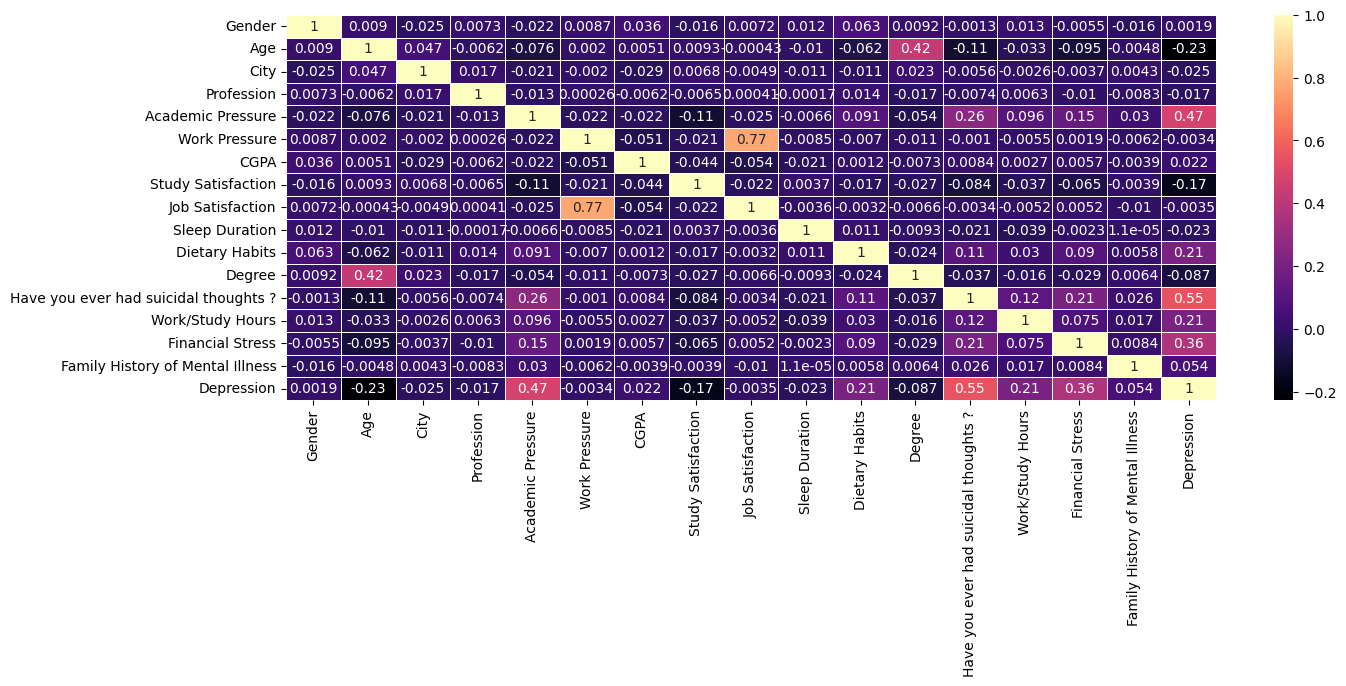

In [21]:
plt.figure(figsize = (15,5))
#wo_id = wo_id.drop(columns=['id']) # drop the id column since it's not needed for correlation
sns.heatmap(wo_id.corr(), annot = True, linewidth = 0.5, cmap ="magma", cbar = True)
plt.show()

Plotting this shows me:
The strongest correlation with depression are (ranked):
The question... "Have you ever had suicidal thoughts? -> 0.55
The academic pressure -> 0.47
The financial stress -> 0.36
The work/study hours -> 0.21
Dietary habits -> 0.21

Things that doesnt really correlate with depression:
Gender, City, Profession, Degree, Sleep Duration -> values range from ~0.01 to ~0.02
Family History of Mental illness -> ~0.05
    There are some correlation but relatively small in this dataset which is surprising.

Something interesting is job satisfaction and work pressure -> correlation ~0.77 with each other.
Academic pressure and suicidal thoughts -> ~0.26 this suggests academic strain may be a trigger for serious mental health concerns.

### Next i'm plotting with seaborn.

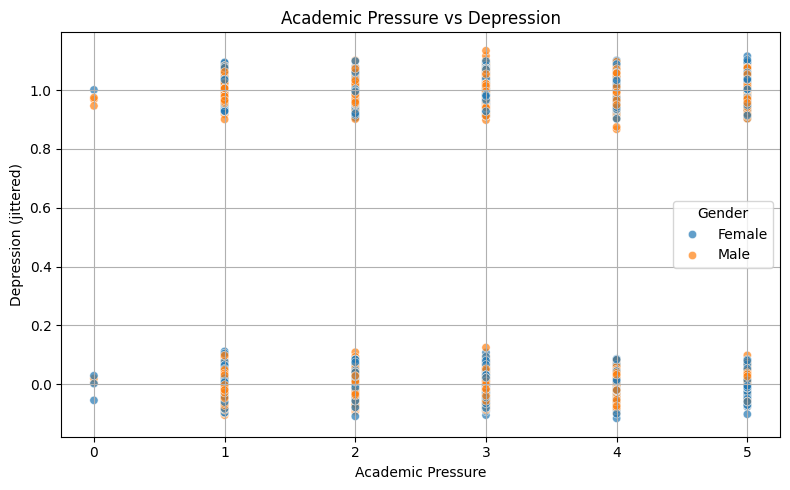

In [ ]:

df_plot = df.copy()
df_plot['Depression'] = df_plot['Depression'].astype(int)
df_plot['Depression_jittered'] = df_plot['Depression'] + np.random.normal(0, 0.03, size=len(df_plot))
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Academic Pressure", y="Depression_jittered", hue="Gender", data=df_plot, alpha=0.7)
plt.title("Academic Pressure vs Depression")
plt.xlabel("Academic Pressure")
plt.ylabel("Depression (jittered)")
plt.grid(True)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

From this plot I can see that the trend of increasing academic pressure, there's a visibly higher density of students with depression.
Lower pressure level have more students without depression.
Gender wise both Male (orange) and Female (blue) students are spread across all pressure levels.
There doesn't appear to be a large gender difference in how academic pressure relates to depression both are affected similarly.

I dropped the 3 work pressure, id, and cgpa since there correlations are not much and have almost no predictive power on depression.

In [ ]:
#wo_id = wo_id.drop(columns=['Work Pressure']) # drop the work pressure column since it's not correlated much
#wo_id = wo_id.drop(columns=['ID']) # drop the id column since it's not needed for correlation
#wo_id = wo_id.drop(columns=['CGPA']) # drop the GPA column since it's not correlated much

I continue to drop job satisfaction since they are students and it really doesnt provide any meaningful variation for EDA.

In [40]:
# Drop Job Satisfaction and Work Pressure columns
df_cleaned = wo_id.drop(columns=["Job Satisfaction"])
# Save to new file
df_cleaned.to_csv("student_data_no_job_work_pressure.csv", index=False)


Continue to plot the cleaned dataset (cleaned of work pressure, job satisfaction, etc)

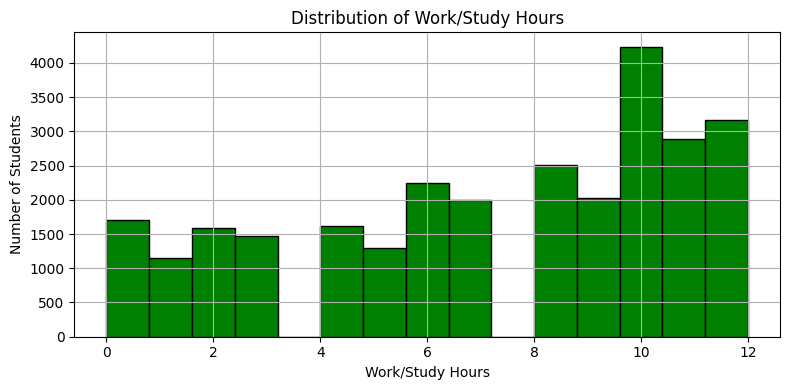

In [46]:
df = pd.read_csv("student_data_no_job_work_pressure.csv")
df["Depression"] = df["Depression"].astype(int)
#Histogram of work/study hours
plt.figure(figsize=(8, 4))
plt.hist(df["Work/Study Hours"], bins=15, color='green', edgecolor='black')
plt.title("Distribution of Work/Study Hours")
plt.xlabel("Work/Study Hours")
plt.ylabel("Number of Students")
plt.grid(True)
plt.tight_layout()
plt.show()

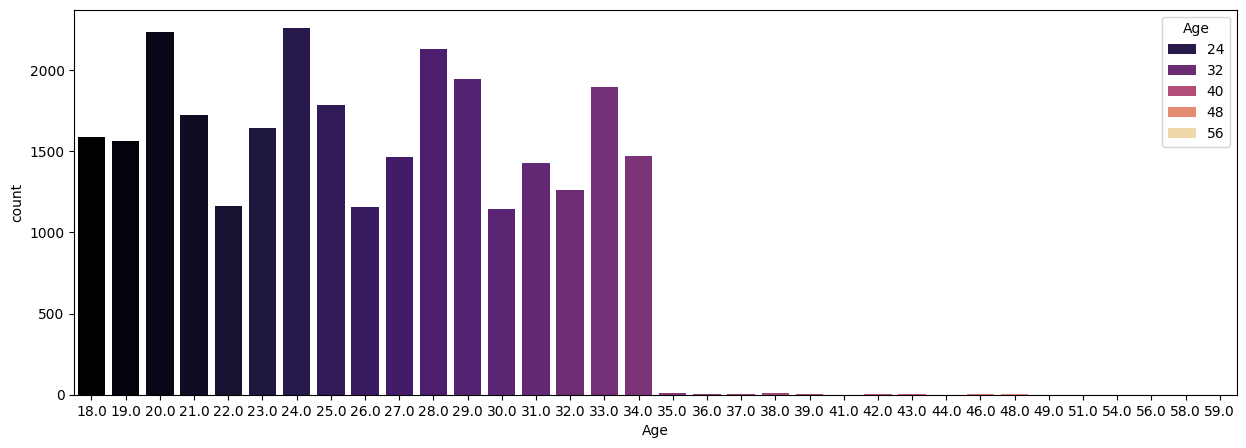

In [44]:
plt.figure(figsize = (15, 5))
sns.countplot(x=wo_id["Age"], data = wo_id, palette = "magma", hue = "Age")
plt.show()

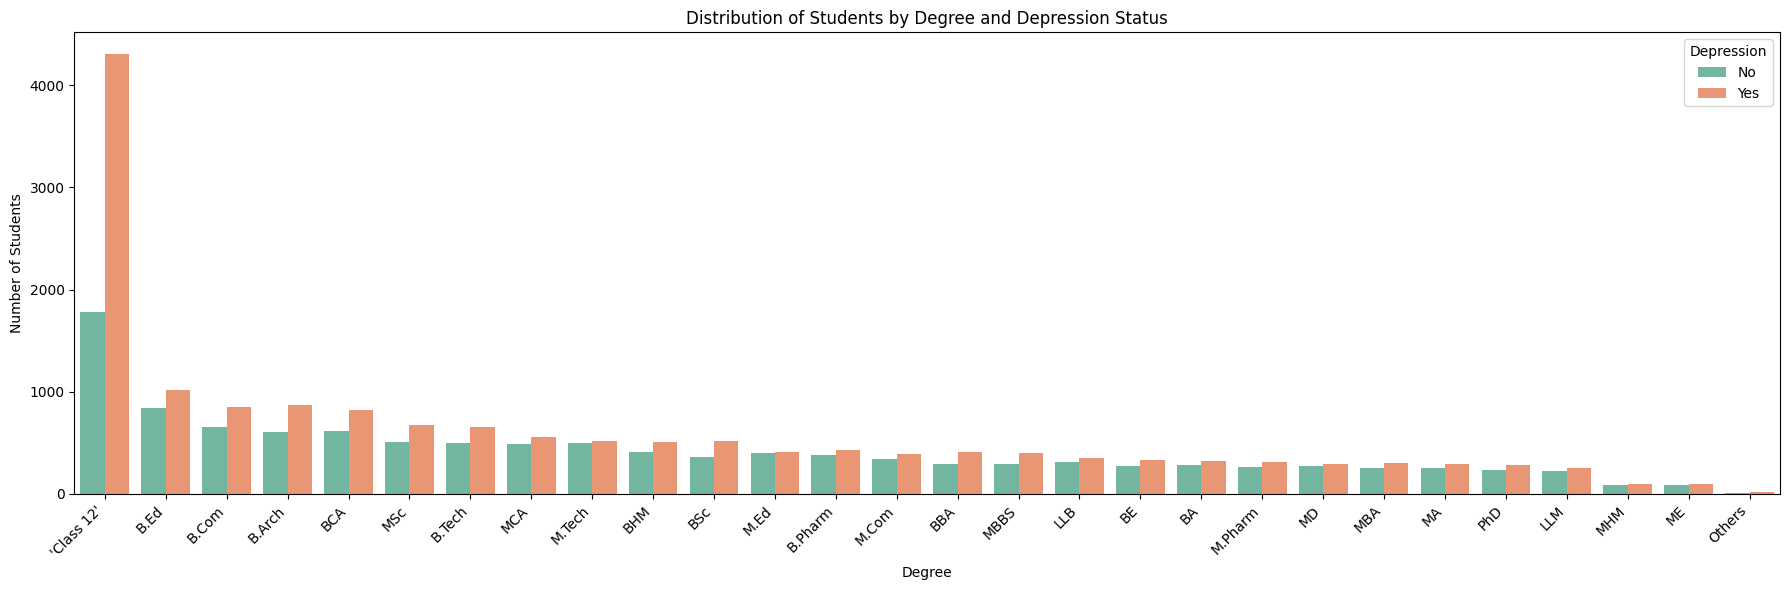

In [ ]:
wo_id["Degree_Label"] = wo_id["Degree"].map(category_mappings["Degree"])
wo_id["Depression"] = wo_id["Depression"].astype(int)
plt.figure(figsize=(18, 6))
sns.countplot(x="Degree_Label", hue="Depression", data=wo_id, palette="Set2",
              order=wo_id["Degree_Label"].value_counts().index)
plt.title("Distribution of Students by Degree and Depression Status")
plt.xlabel("Degree")
plt.ylabel("Number of Students")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Depression", labels=["No", "Yes"])
plt.tight_layout()
plt.show()

This bar chart shows how depression is distributed among students from various academic degree programs. Each degree has two bars:
Green: Students who reported no depression
Orange: Students who reported being depressed

Class 12 students make up the largest group in the dataset, and a significantly higher number of them report depression compared to those who do not. This may reflect the intense academic and transitional pressure faced at this stage.

Most other degree categories also show a higher number of students reporting depression than not, though the difference is less extreme.
Degrees like B.Ed, BCA, MSc, and B.Tech also show a noticeable tilt toward more students reporting depression.
The trend suggests that across almost all educational levels, depression is more common than not, highlighting a widespread concern.

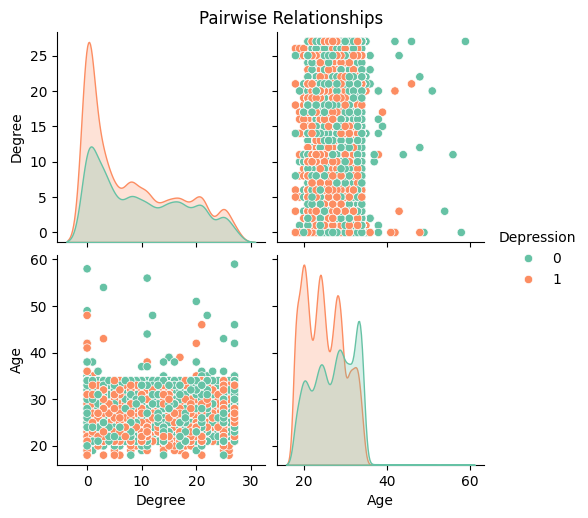

In [58]:
sns.pairplot(wo_id[["Degree", "Age", "Depression"]], hue="Depression", palette="Set2")
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

When I looked at the pairplot of Age and Degree colored by Depression status, a few interesting patterns are there. First, I noticed that most students fall within a fairly tight age range, mainly between 18 and 30 years old. This is expected since the dataset is based on students, and it aligns with typical undergraduate and postgraduate age groups.
On the Age vs. Degree scatter plot, I saw that the degrees are encoded numerically, and most students are concentrated in the lower-degree range (indicating more common or foundational degrees like high school, undergraduate, etc.). The cluster of points around these values shows where most students are studying.
The distribution plots on the diagonal tell me that students with depression (orange) slightly dominate across most degree levels and age groups. Especially on the Degree axis, I noticed that the orange curve (depressed students) tends to rise higher in earlier degree codes — which might correlate with younger students or earlier stages of education.
There doesn’t seem to be a strong linear relationship between age and depression, but it does look like younger students in lower-degree programs may be slightly more affected.

## Part 2

In [68]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
y = wo_id["Depression"]
X = wo_id.select_dtypes(include=["number"]).drop(columns=["Depression"])
model = DecisionTreeRegressor(random_state=42)
model.fit(X, y)
wo_id.head()

,Gender,Age,City,Profession,Academic Pressure,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Degree_Label
0,1,33.0,44,12,5.0,2.0,0.0,0,0,4,1,3.0,1.0,0,1,B.Pharm
1,0,24.0,2,12,2.0,5.0,0.0,0,1,11,0,3.0,2.0,1,0,BSc
2,1,31.0,37,12,3.0,5.0,0.0,2,0,6,0,9.0,1.0,1,0,BA
3,0,28.0,42,12,3.0,2.0,0.0,1,1,8,1,4.0,5.0,1,1,BCA
4,0,25.0,14,12,4.0,3.0,0.0,0,1,17,1,1.0,1.0,0,0,M.Tech


In [71]:
predictions = model.predict(X)
predictions

array([1., 0., 0., ..., 0., 1., 1.], shape=(27890,))

In [74]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7651487988526353

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.71      0.72      2337
           1       0.79      0.80      0.80      3241

    accuracy                           0.77      5578
   macro avg       0.76      0.76      0.76      5578
weighted avg       0.76      0.77      0.76      5578



So I took this from gpt and learn that the model achieved overall accuracy of 76.5%, 3/4 students are correctly predicted.
Precision (class 1) = 0.79, when the model predicts a student is depressed, its correct to 79% of the time.
Recall (Class 1) = 0.80: It correctly finds 80% of all actually depressed students.
F1-Score (Class 1) = 0.80: A strong balance of precision and recall for depressed students.